In [1]:
import pandas as pd

In [28]:
df=pd.read_csv('Adityas_Fully_Processed.csv')
df

,Unnamed: 0,Tweets
0,0,time people back country world end evil empire...
1,1,service policemv
2,2,haircut worst salon opening 4 23 guess haircut...
3,3,ring circus ineptituden n1 apocalypse crier cl...
4,4,internal medicine resident nyc giving caring p...
...,...,...
409756,409756,happy earth day british columbia enjoy scene p...
409757,409757,nnothing britain airport staying open make sen...
409758,409758,fy1 working covid_19 frontline whippscrosshosp...
409759,409759,made feel begin explain sense relief feel work...


In [29]:
df.drop('Unnamed: 0',inplace=True,axis=1)
df

,Tweets
0,time people back country world end evil empire...
1,service policemv
2,haircut worst salon opening 4 23 guess haircut...
3,ring circus ineptituden n1 apocalypse crier cl...
4,internal medicine resident nyc giving caring p...
...,...
409756,happy earth day british columbia enjoy scene p...
409757,nnothing britain airport staying open make sen...
409758,fy1 working covid_19 frontline whippscrosshosp...
409759,made feel begin explain sense relief feel work...


In [25]:
import nltk

In [5]:
with open('ENGLISH.STOP') as file:
    stopwords = [line.strip() for line in file]
stopwords

['a',
 "a's",
 'able',
 'about',
 'above',
 'according',
 'accordingly',
 'across',
 'actually',
 'after',
 'afterwards',
 'again',
 'against',
 "ain't",
 'all',
 'allow',
 'allows',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'an',
 'and',
 'another',
 'any',
 'anybody',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anyways',
 'anywhere',
 'apart',
 'appear',
 'appreciate',
 'appropriate',
 'are',
 "aren't",
 'around',
 'as',
 'aside',
 'ask',
 'asking',
 'associated',
 'at',
 'available',
 'away',
 'awfully',
 'b',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'believe',
 'below',
 'beside',
 'besides',
 'best',
 'better',
 'between',
 'beyond',
 'both',
 'brief',
 'but',
 'by',
 'c',
 "c'mon",
 "c's",
 'came',
 'can',
 "can't",
 'cannot',
 'cant',
 'cause',
 'causes',
 'certain',
 'certainly',
 'changes',
 'clearly',
 'co',
 'com',
 'come',
 'c

In [6]:
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

In [7]:
import re

In [8]:
def tweet_cleaning(tweet):
    words=tweet.split()
    a=[lemmatizer.lemmatize(word) for word in words if word not in stopwords]
    b=' '.join(a)
    out = re.sub(r'[^\w\s]',' ',b)
    c=re.sub("\s\s+", " ", out)
    words1=c.split()
    d=[lemmatizer.lemmatize(word) for word in words1 if word not in stopwords]
    e=' '.join(d)
    return(e)

In [13]:
df['Tweet Text']=df['Tweet Text'].apply(tweet_cleaning)
df

,Tweet ID,Tweet Text
0,1507137709206290435,exhausting amount rage brings selfish people
1,1507137709759819798,covid booster 4 today thankful science covidva...
2,1507137709214773251,epitrace sentinel capability displaying alert ...
3,1507137713492750336,quarantine slaughterhouse number coming covid ...
4,1507137717246865409,week 2 year anniversary covid19 lockdown refle...
...,...,...
265103,1508587250883473410,stay ahead pandemic globally savelives
265104,1508587251621634052,startle greatly cmo_england uksciencechief com...
265105,1508587267123646467,mine time 15mths suffering longcovid discussed...
265106,1508587267828305924,head canada largest union unifortheunion caugh...


In [14]:
df.to_csv('Rohans_Fully_Processed.csv')

In [30]:
df

,Tweets
0,time people back country world end evil empire...
1,service policemv
2,haircut worst salon opening 4 23 guess haircut...
3,ring circus ineptituden n1 apocalypse crier cl...
4,internal medicine resident nyc giving caring p...
...,...
409756,happy earth day british columbia enjoy scene p...
409757,nnothing britain airport staying open make sen...
409758,fy1 working covid_19 frontline whippscrosshosp...
409759,made feel begin explain sense relief feel work...


In [31]:
df.isnull().sum()

Tweets    473
dtype: int64

In [32]:
df.dropna(inplace=True)
df

,Tweets
0,time people back country world end evil empire...
1,service policemv
2,haircut worst salon opening 4 23 guess haircut...
3,ring circus ineptituden n1 apocalypse crier cl...
4,internal medicine resident nyc giving caring p...
...,...
409756,happy earth day british columbia enjoy scene p...
409757,nnothing britain airport staying open make sen...
409758,fy1 working covid_19 frontline whippscrosshosp...
409759,made feel begin explain sense relief feel work...


In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=0.01)
vectors = vectorizer.fit_transform(df['Tweets'])
feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
df2 = pd.DataFrame(denselist, columns=feature_names)

In [34]:
terms = vectorizer.get_feature_names()

# sum tfidf frequency of each term through documents
sums = vectors.sum(axis=0)

# connecting term to its sums frequency
data = []
for col, term in enumerate(terms):
    data.append( (term, sums[0,col] ))

ranking = pd.DataFrame(data, columns=['term','rank'])
ranked=ranking.sort_values('rank', ascending=False)
ranked


,term,rank
39,covid19,44186.933429
36,coronavirus,30987.272275
139,people,12507.462330
183,stayhome,11591.374649
136,pandemic,10836.619045
...,...,...
47,demand,1900.416246
79,globe,1868.847142
86,happy,1862.663446
126,na,1824.475757


In [35]:
ranked.to_csv('temp_aditya_tf-idf.csv')

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt 

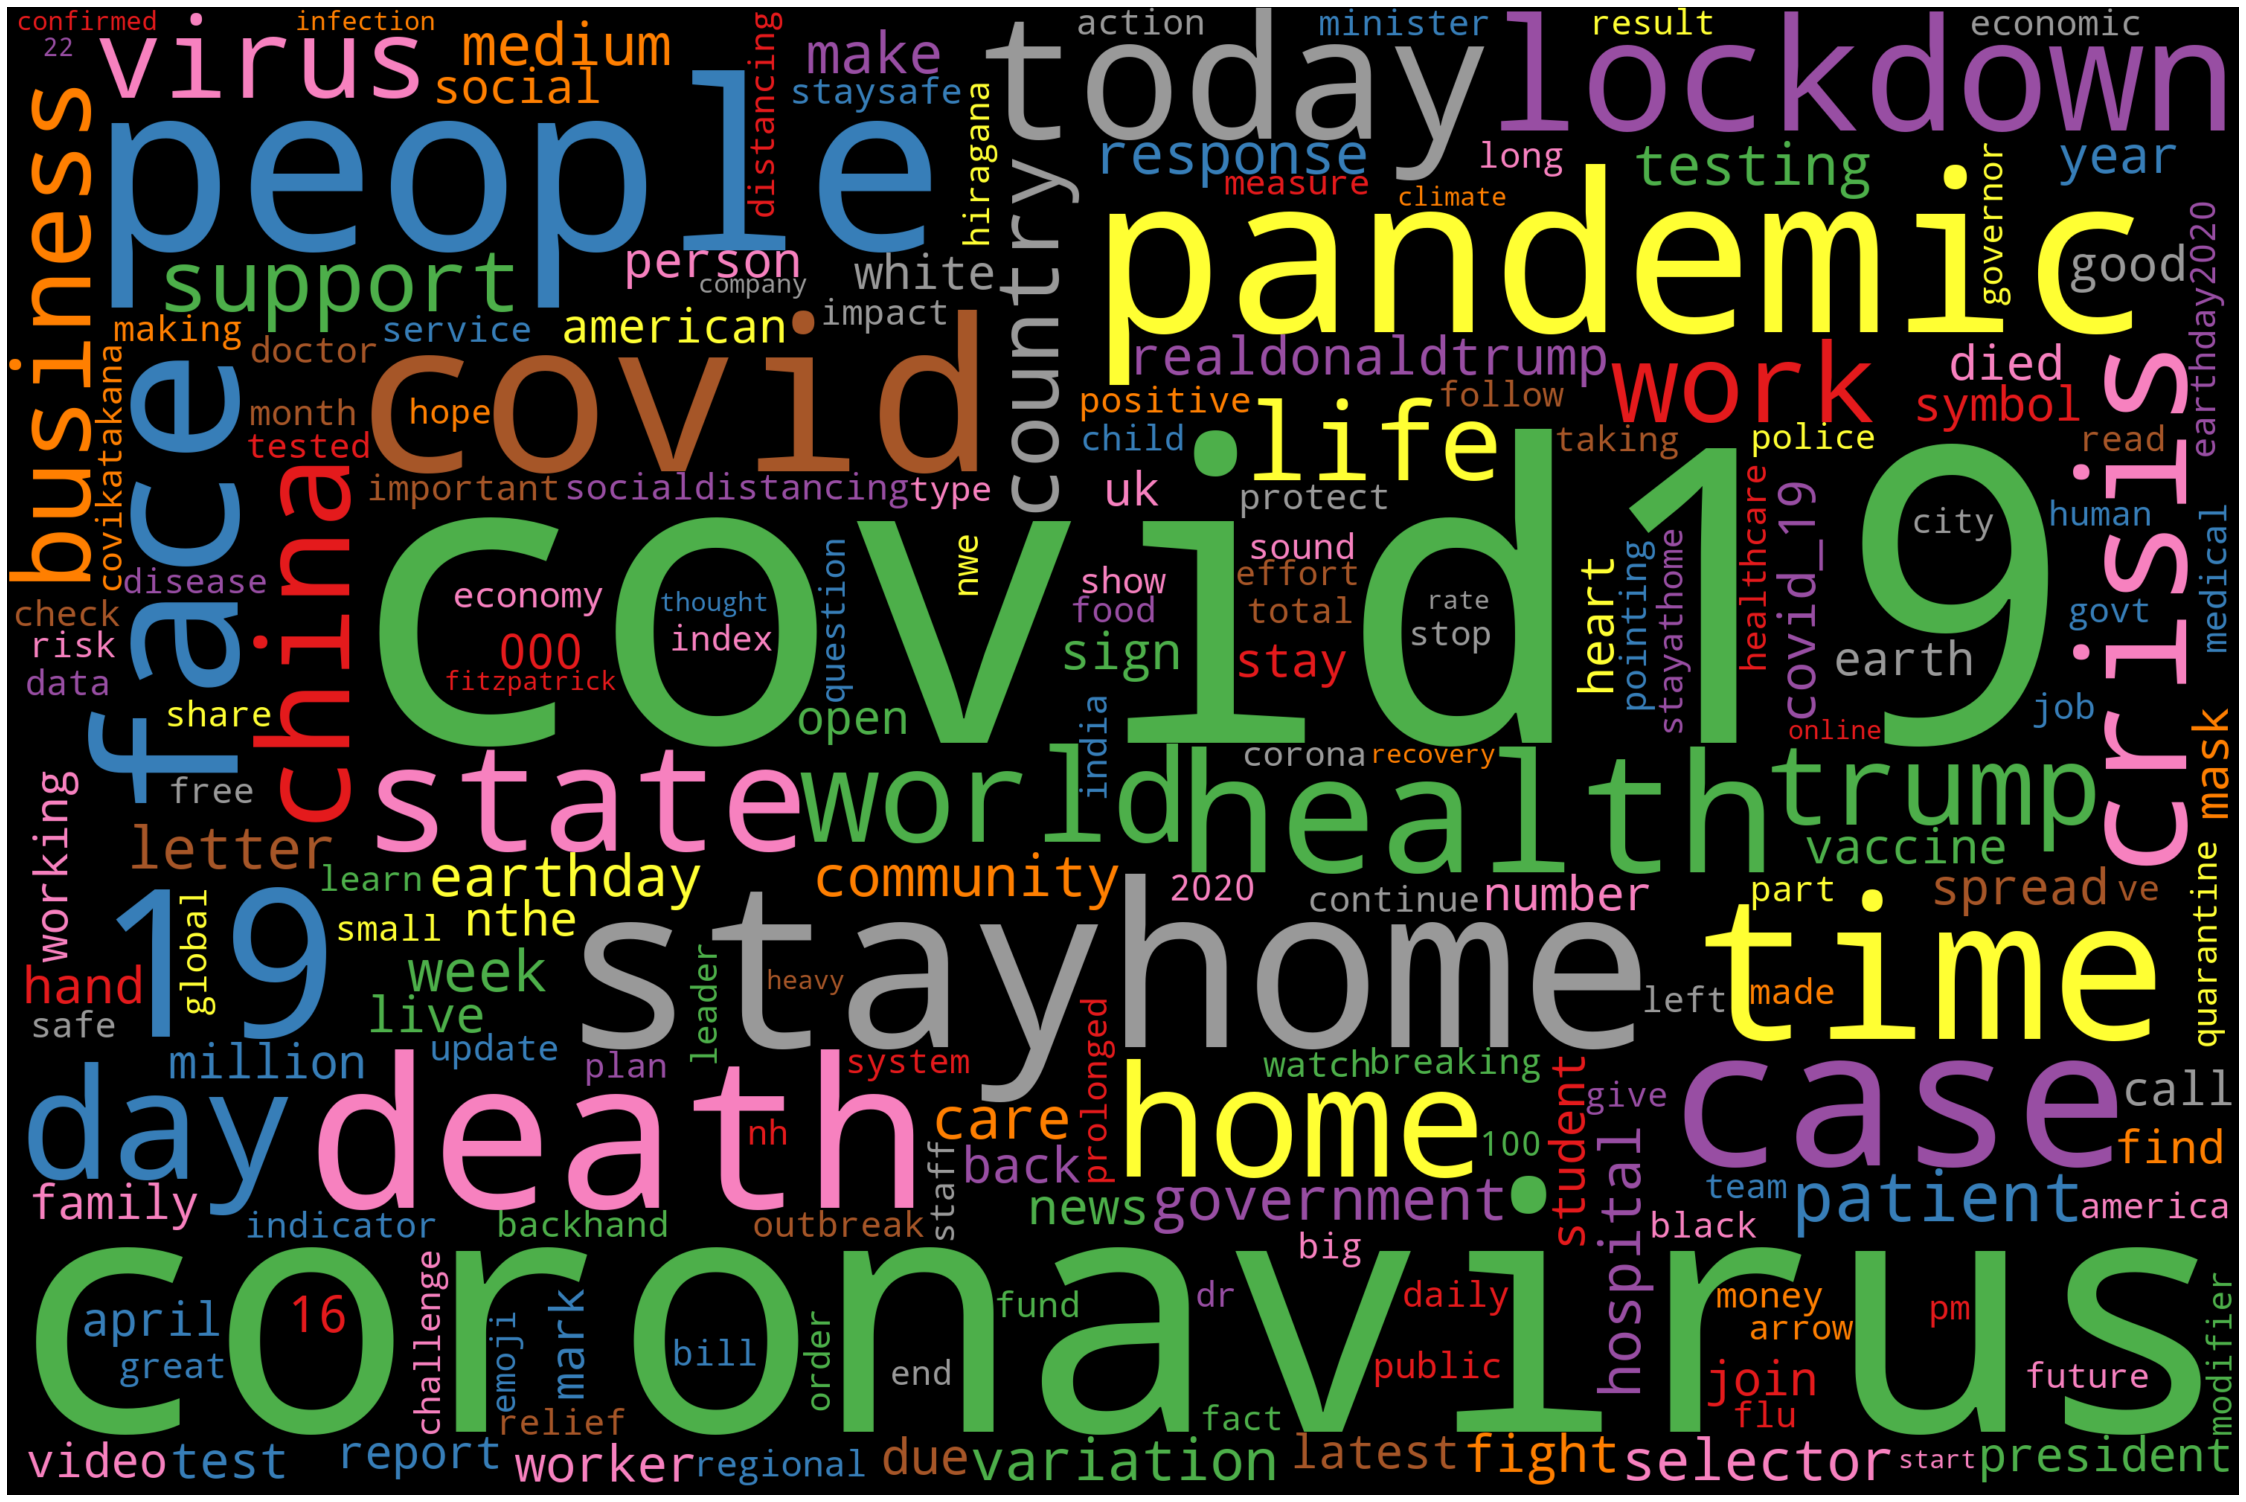

In [36]:
tf_idf_counter = df2.T.sum(axis=1)
wordcloud = WordCloud(width = 3000, height = 2000,background_color='black',colormap='Set1')
wordcloud.generate_from_frequencies(tf_idf_counter)
plt.figure(figsize=(40, 30))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud_aditya_temp.png',format='png',facecolor='w',bbox_inches='tight')
plt.show()